In [ ]:
#Dharvi Mittal
#E20CSE018
#EB07

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))

(70000, 784)
(70000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
data2 = np.array(mnist.data).reshape(70000, 28, 28)

<Figure size 432x288 with 0 Axes>

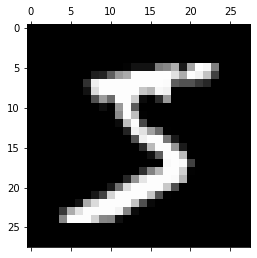

<Figure size 432x288 with 0 Axes>

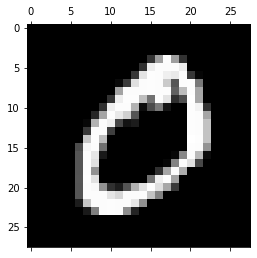

<Figure size 432x288 with 0 Axes>

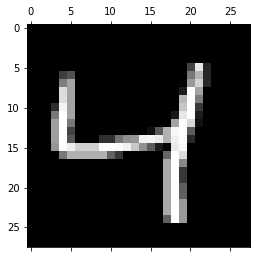

<Figure size 432x288 with 0 Axes>

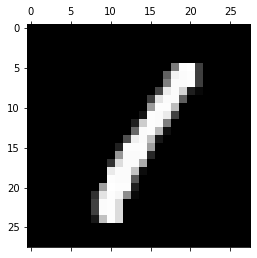

<Figure size 432x288 with 0 Axes>

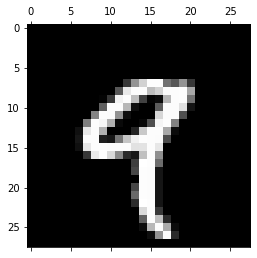

<Figure size 432x288 with 0 Axes>

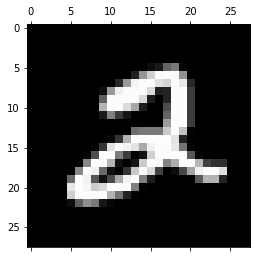

<Figure size 432x288 with 0 Axes>

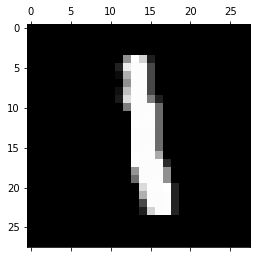

<Figure size 432x288 with 0 Axes>

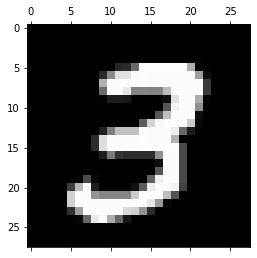

<Figure size 432x288 with 0 Axes>

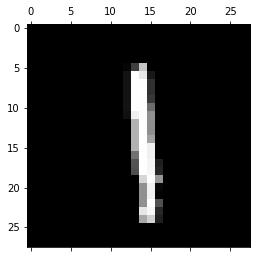

<Figure size 432x288 with 0 Axes>

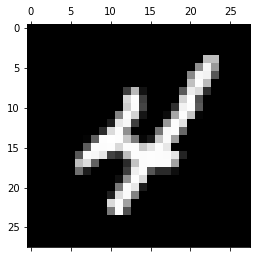

In [ ]:
for i in range(10):
  plt.gray()
  plt.matshow(data2[i])
  plt.show()

In [ ]:
X = mnist.data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = mnist.target
Y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
X.shape, Y.shape

((70000, 784), (70000,))

In [ ]:
X = X/255
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (32,),max_iter=5).fit(x_train, y_train)
clf

MLPClassifier(hidden_layer_sizes=(32,), max_iter=5)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array(['6', '2', '7', ..., '4', '8', '1'], dtype='<U1')

In [ ]:
y_pred.shape

(14000,)

In [ ]:
print("ACCURACY:",accuracy_score(y_test, y_pred)*100)

ACCURACY: 94.50714285714285


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.96539293, 0.96480583, 0.96431173, 0.94218415, 0.93679458,
        0.93891934, 0.94996321, 0.946794  , 0.92290586, 0.91424522]),
 array([0.97028986, 0.97426471, 0.9239358 , 0.92243187, 0.9375    ,
        0.92444102, 0.96994741, 0.96121884, 0.9215396 , 0.93954843]),
 array([0.9678352 , 0.9695122 , 0.94369209, 0.93220339, 0.93714716,
        0.93162393, 0.9598513 , 0.95395189, 0.92222222, 0.92672414]),
 array([1380, 1632, 1433, 1431, 1328, 1297, 1331, 1444, 1351, 1373]))

In [ ]:
per = [0.4,0.3,0.2,0.1]
accuracy = []
for i in per:
  X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=i,shuffle=True)
  y_pred = clf.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))
print(accuracy)

[0.953, 0.9504761904761905, 0.9512857142857143, 0.9548571428571428]


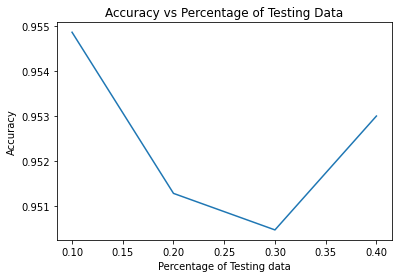

In [ ]:
import matplotlib.pyplot as plt
plt.plot(per,accuracy)
plt.xlabel("Percentage of Testing data")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Percentage of Testing Data")
plt.show()

In [ ]:
def MLPClass(n, i, spl):
  mlp = MLPClassifier(hidden_layer_sizes=(n), max_iter=i)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = spl)
  mlp.fit(x_train, y_train)
  print("Training set score: %f" % mlp.score(x_train, y_train))
  print("Test set score: %f" % mlp.score(x_test, y_test))
  return (mlp.score(x_test, y_test), (mlp.score(x_train, y_train)))

In [ ]:
xpoint = []
ypoint = []
x2point = []
n = 32
i = 2
split = 0.8
for k in range(15):
  l, m = MLPClass(n, i, split)
  x2point.append(l)
  xpoint.append(m)
  ypoint.append(i)
  i += 2

Training set score: 0.928071
Test set score: 0.923714
Training set score: 0.952250
Test set score: 0.942143
Training set score: 0.958054
Test set score: 0.947214
Training set score: 0.963250
Test set score: 0.951357
Training set score: 0.968393
Test set score: 0.955429
Training set score: 0.974875
Test set score: 0.961714
Training set score: 0.975125
Test set score: 0.959500
Training set score: 0.980607
Test set score: 0.962571
Training set score: 0.981089
Test set score: 0.966857
Training set score: 0.980643
Test set score: 0.965286
Training set score: 0.984482
Test set score: 0.964714
Training set score: 0.985357
Test set score: 0.967357
Training set score: 0.983857
Test set score: 0.969286
Training set score: 0.987304
Test set score: 0.963500
Training set score: 0.990982
Test set score: 0.965929


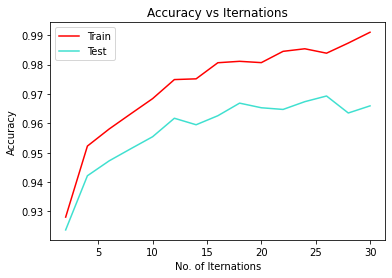

In [ ]:
plt.xlabel('No. of Iternations') 
plt.ylabel('Accuracy') 
plt.title("Accuracy vs Iternations")
plt.plot(ypoint, xpoint, color = 'red', label = 'Train')
plt.plot(ypoint, x2point, color = 'blue', label = 'Test')
plt.legend()
plt.show()